# Introduction to Thermodynamics and Statistical Physics

In this lecture, we are going to discuss entropy. In particular, we'll cover:

* Entropy of mixing.
* Entropy and probability.
* Alternative Thermodynamics Potentials (internal energy and enthalpy).


## Entropy of mixing

Let us know consider 2 different ideal gases. They are initially in separate vessels with volume $x V$ an $(1-x) V$ respectively, where $0<x<1$. Both gases are at the same pressure, $P$, and temperature, $T$.

![Entropy_of_mixing](Figures/Entropy_of_mixing.png)

We can write the pressure of either gas to be
$$
    P = \frac{N_{1,2}k_{\rm B}T}{V_{1,2}}
$$
Since the pressure in both gases is the same, this gives
$$
    \frac{N_1k_{\rm B}T}{xV} = \frac{N_2k_{\rm B}T}{(1-x)V}
$$
If we then define $N=N_1+N_2$ as the total number of particles, then we get that $N_1 = xN$ and $N_2 = (1-x)N$.

If we now open the tap, then the gases will mix. As we considered for the Joule expansion, we can calculate the entropy by imagining that the mixing occurs reversibly. Let's imagine an isothermal expansion, which means that the internal energies of the gases do not change. This means that
$$
    T {\rm d}S = P{\rm d} V \rightarrow {\rm d}S = \frac{P{\rm d} V}{T} \rightarrow {\rm d}S =  \frac{N k_{\rm B}}{V} {\rm d} V
$$
Now, to find the total change in entropy, we consider the change in entropy due to gas 1 expanding isothermally to fill the full container, and gas 2 expanding isothermally to fill the full container
\begin{align}
    \Delta S &= \int_{xV}^{V} \frac{N_1 k_{\rm B}}{V_1} {\rm d} V_1 + \int_{(1-x)V}^{V} \frac{N_2 k_{\rm B}}{V_2} {\rm d} V_2 \\
             &= \int_{xV}^{V} \frac{xN k_{\rm B}}{V_1} {\rm d} V_1 + \int_{(1-x)V}^{V} \frac{(1-x)N k_{\rm B}}{V_2} {\rm d} V_2 \\
             &= xN k_{\rm B} \int_{xV}^{V} \frac{1}{V_1} {\rm d} V_1 + (1-x)N k_{\rm B}\int_{(1-x)V}^{V} \frac{1}{V_2} {\rm d} V_2 \\
             &= xN k_{\rm B} (\ln (V) - \ln (xV)) + (1-x)N k_{\rm B}(\ln (V) - \ln ((1-x)V)) \\
             &= -N k_{\rm B}[x\ln (x) + (1-x)\ln(1-x)]
\end{align}
So how does this look?

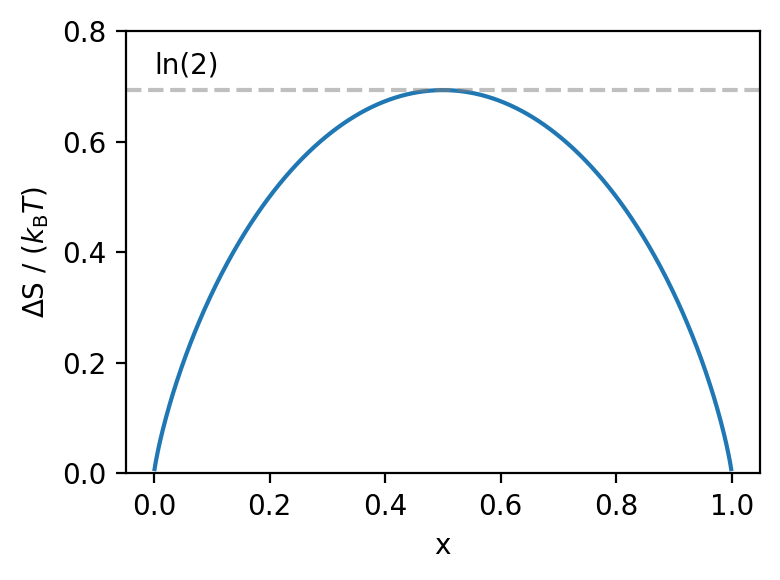

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.001,1.001,0.002)
S = -(x*np.log(x)+(1-x)*np.log(1-x))

plt.figure(figsize=[4,3],dpi=200)
plt.plot(x,S)
plt.axhline(np.log(2),linestyle='--',color='grey',alpha=0.5)
plt.text(0,np.log(2)+0.03,"ln(2)")
plt.ylim(0.,0.8)
plt.xlabel("x")
plt.ylabel(r"$\Delta$S / ($k_{\rm B} T)$")
plt.tight_layout()
plt.savefig("Figures/Entropy_Mixing_Plot.png")
plt.show()

From this, it is clear that the maximum change in entropy occurs when $x=0.5$. We can also arrive at this same result by considering the microstates for the gases. Before mixing, we know that gas 1 is only in the first vessel, while gas 2 is only in the second vessel. After mixing, the number of microstates available to each particle increases by 2 - they can either be in the first vessel, or the second vessel. As such, the statistical weight, $\Omega$, must be multipled by $2^N$ to account for these new microstates. This means that 
$$
    \Delta S = k_{\rm B} \ln 2^N = N k_{\rm B} \ln 2
$$


## Combining Entropy & Probability

Consider again $S=k_{\rm B} \ln \Omega$. How does the entropy account for microstates? Let's do an example to check.

Imagine we have a system which has 5 macrostates (that is, these states are easily distinguishable by measuring some macrovariable such as energy), each of which is equally likely to occur. This means that
$$
    S=k_{\rm B} \ln 5
$$
Now assume that each macrostate has 3 microstates (states which we cannot distinguish, so associated perhaps with particle positions or momenta) associated with it, which are also equally likely to occur. This means that there is an additional entropy associated with each of these microstates, $S_{\rm micro} = k_{\rm B} \ln 3$.

There are a total of 15 unique states the system can be in (5 macro, 3 micro for each macro). The total entropy of the system is thus given by 
$$
    S_{\rm total}=k_{\rm B} \ln 15
$$
which can be decomposed into
$$
    S_{\rm total}=k_{\rm B} \ln 5+k_{\rm B} \ln 3
$$
This means that we can write
$$
    S_{\rm total} = S+S_{\rm micro}
$$
The reasons for doing this will become clear in a second.

Now, consider a system which has a total of N equally-likely microstates. These microstates are subdivided into groups corresponding to macrostates, such that a macrostate $i$ has a total of $n_i$ microstates associated with it. We require that
$$
    \sum _i n_i = N
$$
(That is, summing together the number of microstates in each macrostate is the same as the total number of microstates available). The probability that the system is in the $i$th macrostate is then given by
$$
    P_i = \frac{n_i}{N}.
$$
The total entropy of this system is
$$
    S_{\rm total} = k_{\rm B} \ln N
$$
The problem we are faced with is that, quite often, $N$ is difficult to measure. For examples like dipoles oriented in magnetic fields, we have a rough idea (it's of order $2^M$ for M particles), but this is only for a very specific example. In general, we have
$$
    S_{\rm total} = S+S_{\rm micro}
$$
where $S$ is the entropy due to the number of macrostates while $S_{\rm micro}$ is an unknown entropy contribution to the number of available microstates. This is given by
$$
    S_{\rm micro} = <S_i> = \sum_i P_i S_i
$$
Given this, we can do the following
\begin{align}
    S &= S_{\rm total} - S_{\rm micro}\\
      &= k_{\rm B} (\ln N - \sum_i P_i \ln n_i)\\
      &= k_{\rm B} \sum_i P_i( \ln N - \ln n_i)\\
\end{align}
Now, $\ln (N) - \ln (n_i) = \ln(N/n_i) = \ln(1/P_i)= -\ln(P_i)$. This gives us Gibbs' definition of Entropy
$$
    S = - k_{\rm B} \sum_i P_i \ln(P_i)
$$